In [1]:
import pandas as pd

def read_xvg(file_path):
    headers = []
    data = []
    
    # Open and read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Extract headers from lines starting with '@ s'
    for line in lines:
        line = line.strip()
        if line.startswith('@ s'):
            # Extract legend text after 'legend'
            header = line.split('legend ')[1].strip('"')
            headers.append(header)
        elif not (line.startswith('@') or line.startswith('#')):
            data.append(line.split())
    
    # Print headers and data length for debugging
    print("Headers:", headers)
    print("Number of data rows:", len(data))
    if data:
        print("First data row:", data[0])
        print("Number of columns in data:", len(data[0]))
    
    # Handle potential mismatch between headers and data columns
    if headers and len(headers) != len(data[0]):
        print(f"Warning: Number of headers ({len(headers)}) does not match number of columns in data ({len(data[0])})")
        # Optionally truncate or pad headers to match data columns
        if len(headers) > len(data[0]):
            headers = headers[:len(data[0])]  # Truncate headers if there are extra headers
        else:
            headers += [f'Column_{i}' for i in range(len(headers), len(data[0]))]  # Pad headers with default names
    
    # Convert to DataFrame
    df = pd.DataFrame(data, columns=headers)
    
    # Convert all columns to numeric values, ignore errors for non-numeric data
    df = df.apply(pd.to_numeric, errors='ignore')
    
    return df

# Define the file path
file_path = 'Data/1hz3_T310.run.25000000.energy.xvg'

# Load the data
df = read_xvg(file_path)

# Convert time from ps to ns if 'Time' column exists
if 'Time' in df.columns:
    df['Time'] = df['Time'] / 1000.0

# Display the DataFrame (for debugging purposes)
print(df.head())


Headers: ['Time', 'Potential', 'Kinetic En.', 'Total Energy', 'Temperature', 'Pressure', 'Volume']
Number of data rows: 501
First data row: ['0.000000', '-175680.937500', '35128.644531', '-140552.296875', '309.853302', '84.967438', '137.956879']
Number of columns in data: 7
   Time      Potential   Kinetic En.   Total Energy  Temperature    Pressure  \
0   0.0 -175680.937500  35128.644531 -140552.296875   309.853302   84.967438   
1   0.1 -175387.062500  35737.015625 -139650.046875   315.219452  116.084549   
2   0.2 -175059.531250  35401.789062 -139657.750000   312.262573  -85.727356   
3   0.3 -175760.984375  35717.289062 -140043.687500   315.045502  269.017548   
4   0.4 -174898.718750  35252.562500 -139646.156250   310.946320 -129.284088   

       Volume  
0  137.956879  
1  137.819077  
2  137.437531  
3  135.811859  
4  137.846680  


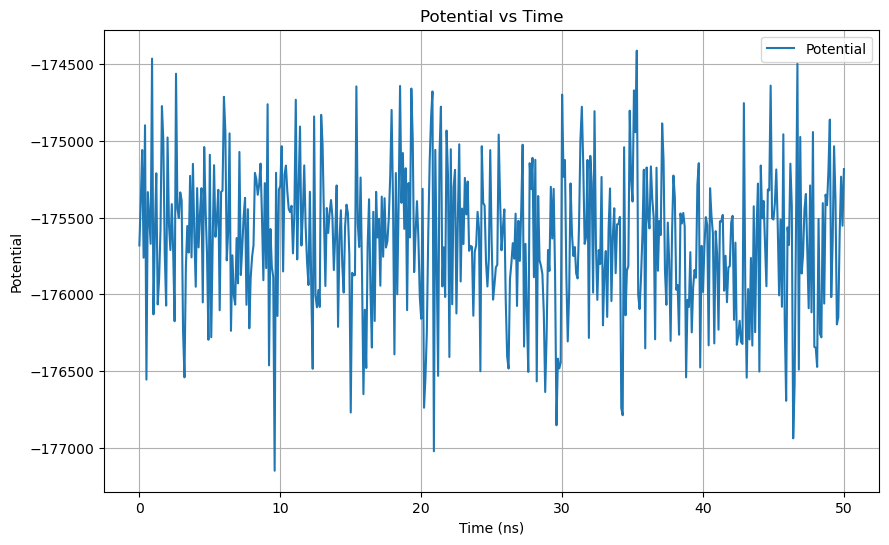

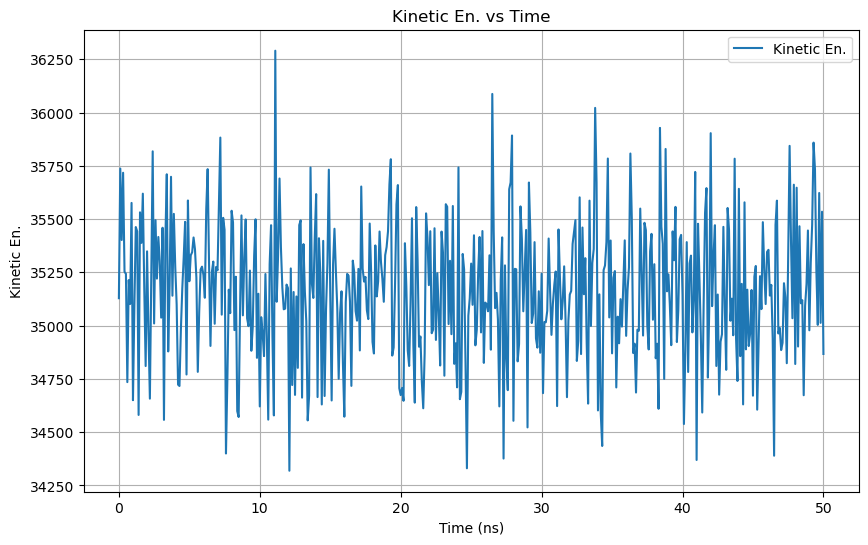

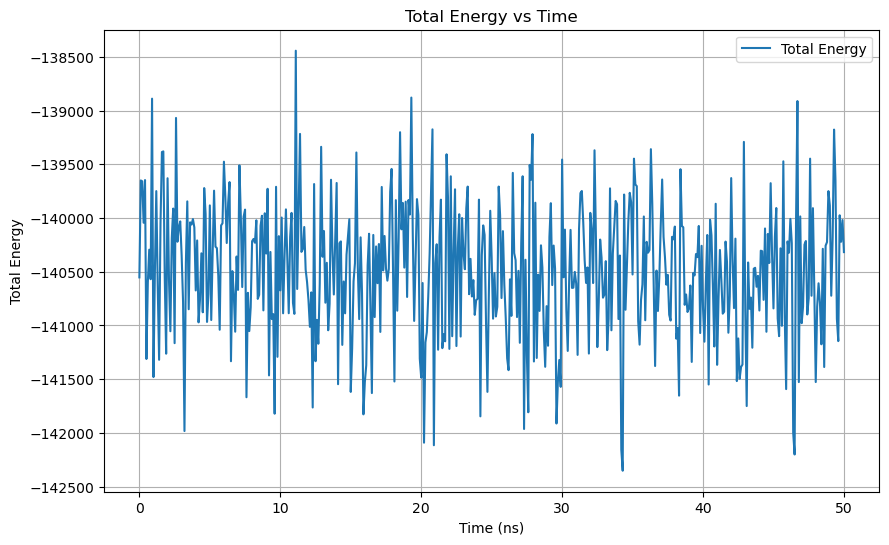

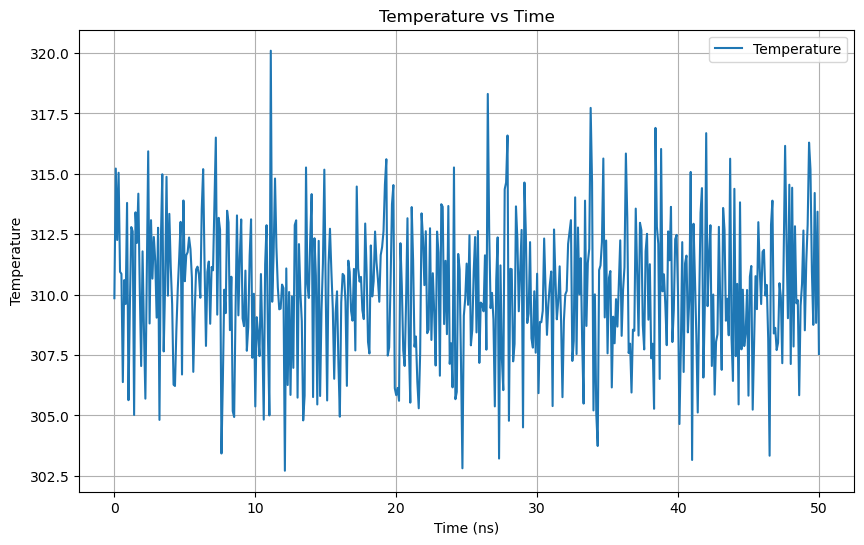

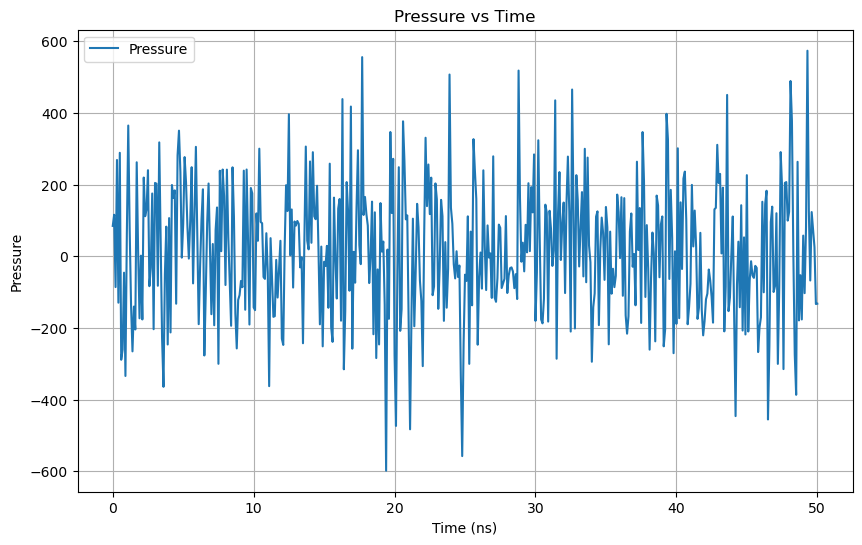

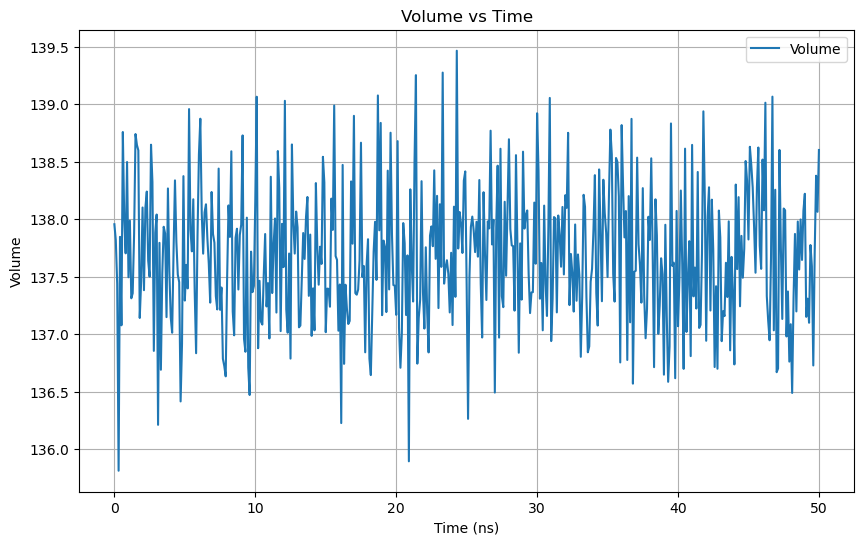

In [2]:
# Plot each quantity against time
import matplotlib.pyplot as plt
for column in df.columns:
    if column != 'Time':  # Skip plotting time against itself
        plt.figure(figsize=(10, 6))
        plt.plot(df['Time'], df[column], label=column)
        plt.xlabel('Time (ns)')
        plt.ylabel(column)
        plt.title(f'{column} vs Time')
        plt.legend()
        plt.grid(True)
        plt.show()


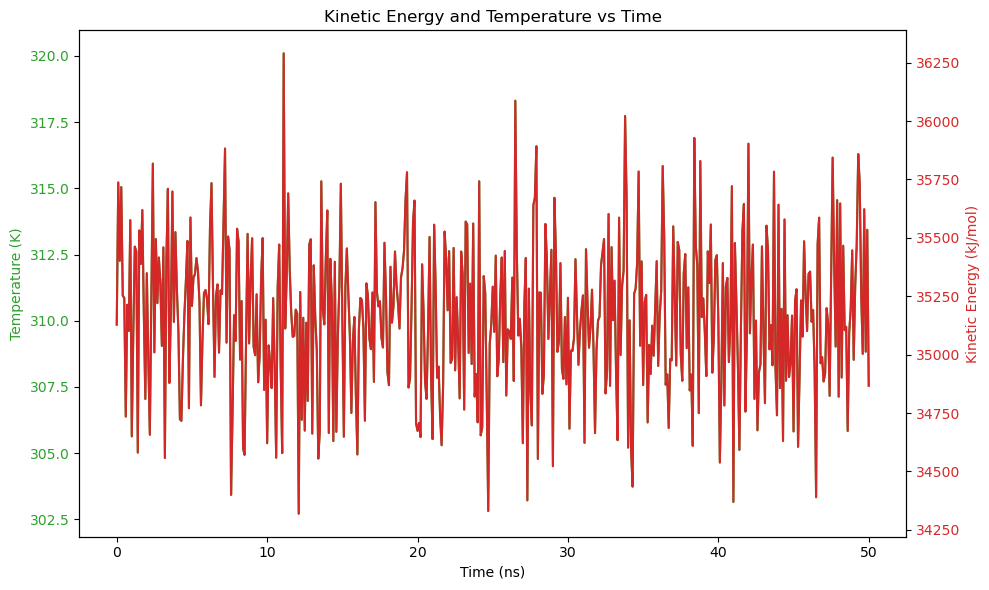

In [3]:
# Plot kinetic energy and temperature on the same plot with different y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Temperature on the left y-axis
color = 'tab:green'
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Temperature (K)', color=color)
ax1.plot(df['Time'], df['Temperature'], color=color, label='Temperature')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Kinetic Energy
ax2 = ax1.twinx()  # Instantiate a second y-axis that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Kinetic Energy (kJ/mol)', color=color)
ax2.plot(df['Time'], df['Kinetic En.'], color=color, label='Kinetic Energy')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and grid
plt.title('Kinetic Energy and Temperature vs Time')

# Show the plot
fig.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
